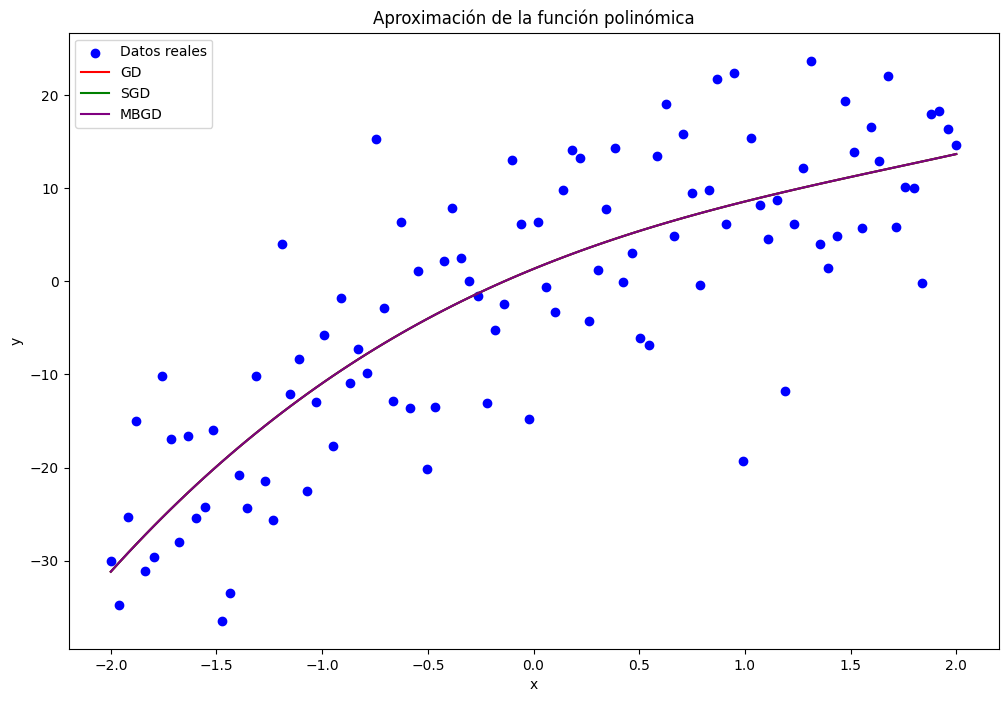

Tiempo de ejecución GD: 4.1737 segundos
Tiempo de ejecución SGD: 3.5425 segundos
Tiempo de ejecución MBGD: 3.3702 segundos
El método más rápido fue MBGD.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Definir la función polinómica y su derivada
def polynomial(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def polynomial_derivative(x):
    return 6 * x**2 - 6 * x + 5

# Generar datos sintéticos
np.random.seed(42)
x = np.linspace(-2, 2, 100)
y = polynomial(x) + np.random.normal(0, 10, x.shape)

# Hiperparámetros
learning_rate = 0.01
epochs = 1000
batch_size = 10

# Inicializar parámetros
theta = np.random.randn(4)

# Descenso de Gradiente (GD)
def gradient_descent(x, y, theta, learning_rate, epochs):
    m = len(y)
    for _ in range(epochs):
        gradient = np.zeros_like(theta)
        for i in range(m):
            y_pred = np.polyval(theta, x[i])
            gradient += (y_pred - y[i]) * np.array([x[i]**3, x[i]**2, x[i], 1])
        gradient /= m
        theta -= learning_rate * gradient
    return theta

# Descenso de Gradiente Estocástico (SGD)
def stochastic_gradient_descent(x, y, theta, learning_rate, epochs):
    m = len(y)
    for _ in range(epochs):
        for i in range(m):
            y_pred = np.polyval(theta, x[i])
            gradient = (y_pred - y[i]) * np.array([x[i]**3, x[i]**2, x[i], 1])
            theta -= learning_rate * gradient
    return theta

# Descenso de Gradiente por Mini-Batches (MBGD)
def mini_batch_gradient_descent(x, y, theta, learning_rate, epochs, batch_size):
    m = len(y)
    for _ in range(epochs):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            gradient = np.zeros_like(theta)
            for j in range(len(x_batch)):
                y_pred = np.polyval(theta, x_batch[j])
                gradient += (y_pred - y_batch[j]) * np.array([x_batch[j]**3, x_batch[j]**2, x_batch[j], 1])
            gradient /= len(x_batch)
            theta -= learning_rate * gradient
    return theta

# Medir el tiempo de ejecución
start_time = time.time()
theta_gd = gradient_descent(x, y, theta, learning_rate, epochs)
gd_time = time.time() - start_time

start_time = time.time()
theta_sgd = stochastic_gradient_descent(x, y, theta, learning_rate, epochs)
sgd_time = time.time() - start_time

start_time = time.time()
theta_mbgd = mini_batch_gradient_descent(x, y, theta, learning_rate, epochs, batch_size)
mbgd_time = time.time() - start_time

# Graficar los resultados
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x, np.polyval(theta_gd, x), color='red', label='GD')
plt.plot(x, np.polyval(theta_sgd, x), color='green', label='SGD')
plt.plot(x, np.polyval(theta_mbgd, x), color='purple', label='MBGD')
plt.legend()
plt.title('Aproximación de la función polinómica')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Comparar tiempos de ejecución
print(f"Tiempo de ejecución GD: {gd_time:.4f} segundos")
print(f"Tiempo de ejecución SGD: {sgd_time:.4f} segundos")
print(f"Tiempo de ejecución MBGD: {mbgd_time:.4f} segundos")

# Determinar cuál método fue más rápido
if gd_time < sgd_time and gd_time < mbgd_time:
    print("El método más rápido fue GD.")
elif sgd_time < gd_time and sgd_time < mbgd_time:
    print("El método más rápido fue SGD.")
else:
    print("El método más rápido fue MBGD.")